<a href="https://colab.research.google.com/github/FarrasNayan321/UASML/blob/main/UAS_ML_NO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FarrasNayan321/UASML/main/DNA.csv')
df

,num_of_atoms,num_of_heavy_atoms
0,14,6
1,11,5
2,15,6
3,21,7
4,20,7
...,...,...
14605,15,6
14606,14,6
14607,18,6
14608,17,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14610 entries, 0 to 14609
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   num_of_atoms        14610 non-null  int64
 1   num_of_heavy_atoms  14610 non-null  int64
dtypes: int64(2)
memory usage: 228.4 KB


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()




(14610, 2)


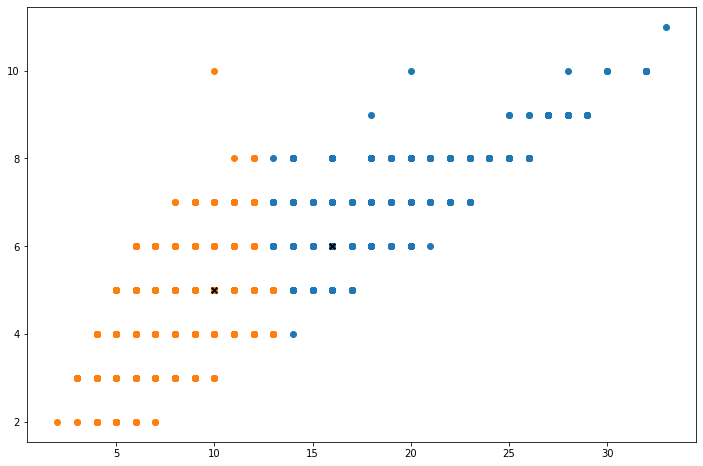

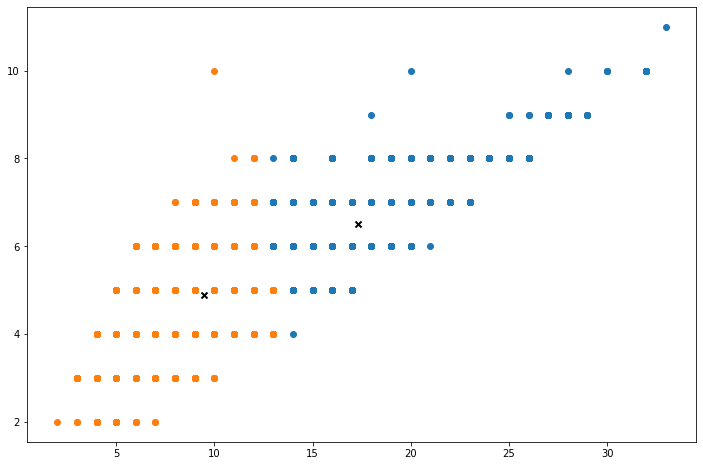

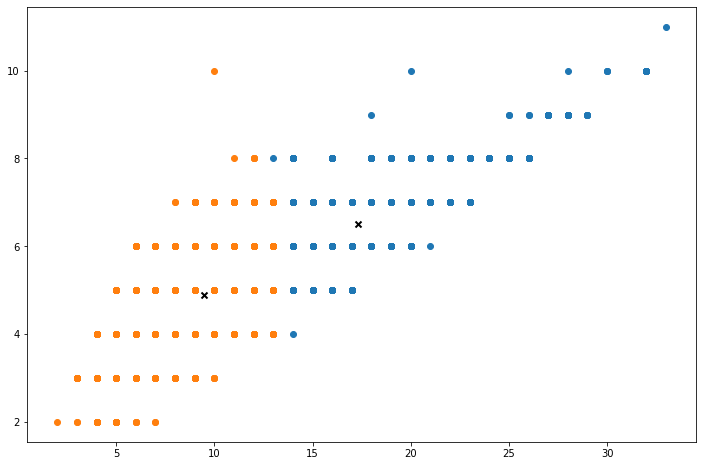

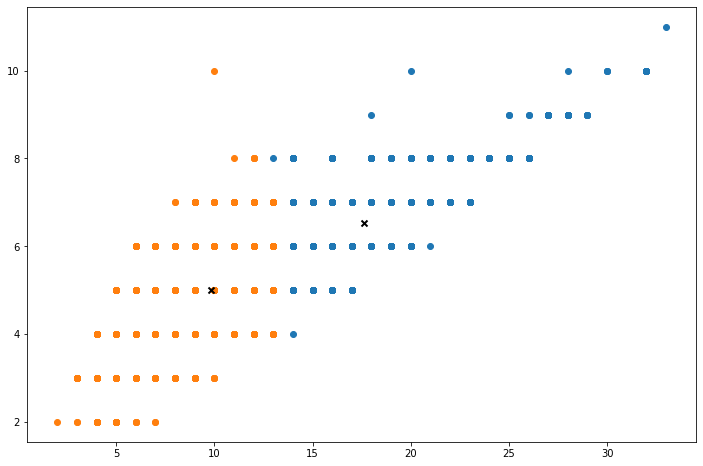

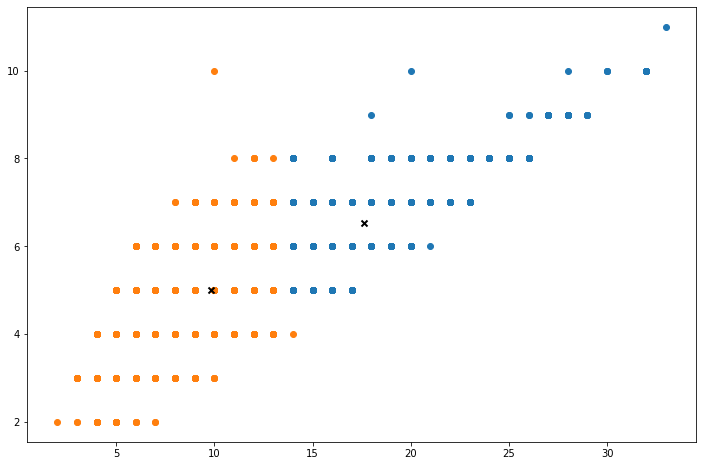

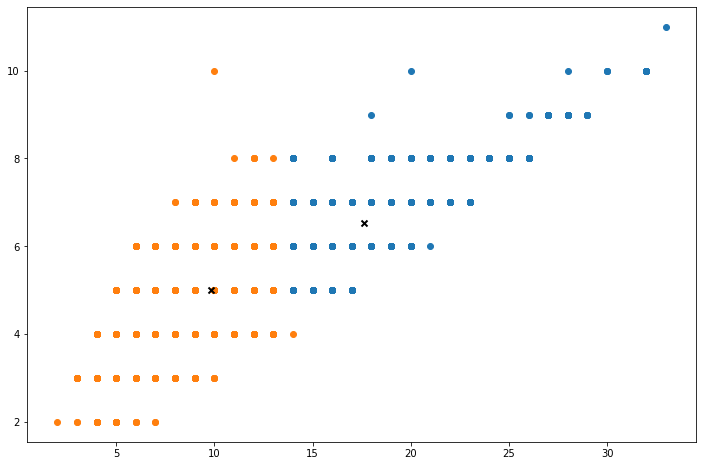

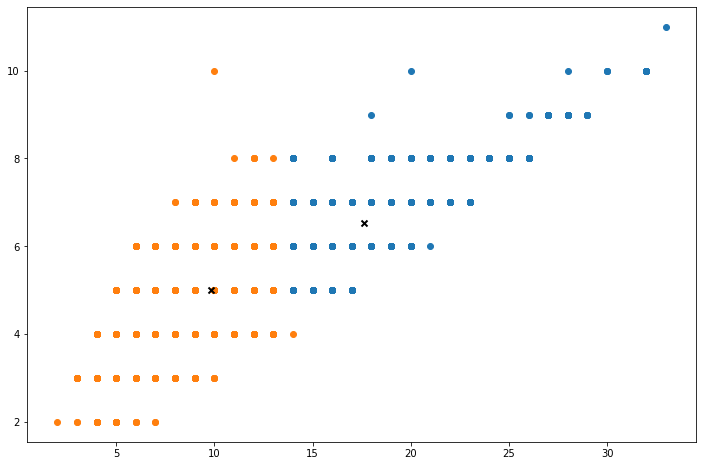

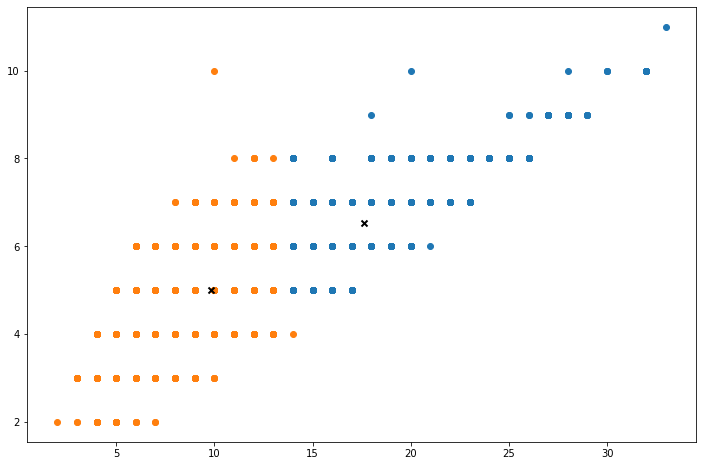

In [ ]:
X=np.array(df)
cluster=2
k=KMeans(K=cluster,max_iters=100,plot_steps=True)
y_pred=k.predict(X=X)
k.plot()